In [173]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf
# For time stamps
from datetime import datetime


# Magnificent 7 stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NVDA', 'TSLA', 'META']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

companies = {}

for stock in tech_list:
    df = yf.download(stock, start, end)
    print(df.columns)
    companies[stock] = df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])
MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MultiIndex([('Adj Close', 'MSFT'),
            (    'Close', 'MSFT'),
            (     'High', 'MSFT'),
            (      'Low', 'MSFT'),
            (     'Open', 'MSFT'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])
MultiIndex([('Adj Close', 'AMZN'),
            (    'Close', 'AMZN'),
            (     'High', 'AMZN'),
            (      'Low', 'AMZN'),
            (     'Open', 'AMZN'),
            (   'Volume', 'AMZN')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])
MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', 'META'),
            (    'Close', 'META'),
            (     'High', 'META'),
            (      'Low', 'META'),
            (     'Open', 'META'),
            (   'Volume', 'META')],
           names=['Price', 'Ticker'])


In [174]:
# Adding the lagged price and next week price (target)

for company in companies:
    companies[company]["Next Week Price", company] = companies[company]["Adj Close", company].shift(-5)
    companies[company]["Close Price (-1)", company] = companies[company]["Adj Close", company].shift(1)
    companies[company]["Close Price (-5)", company] = companies[company]["Adj Close", company].shift(5)
    companies[company]["Close Price (-10)", company] = companies[company]["Adj Close", company].shift(10)
    companies[company]["Close Price (-25)", company] = companies[company]["Adj Close", company].shift(25)
    

print(companies[company].columns)

MultiIndex([(        'Adj Close', 'META'),
            (            'Close', 'META'),
            (             'High', 'META'),
            (              'Low', 'META'),
            (             'Open', 'META'),
            (           'Volume', 'META'),
            (  'Next Week Price', 'META'),
            ( 'Close Price (-1)', 'META'),
            ( 'Close Price (-5)', 'META'),
            ('Close Price (-10)', 'META'),
            ('Close Price (-25)', 'META')],
           names=['Price', 'Ticker'])


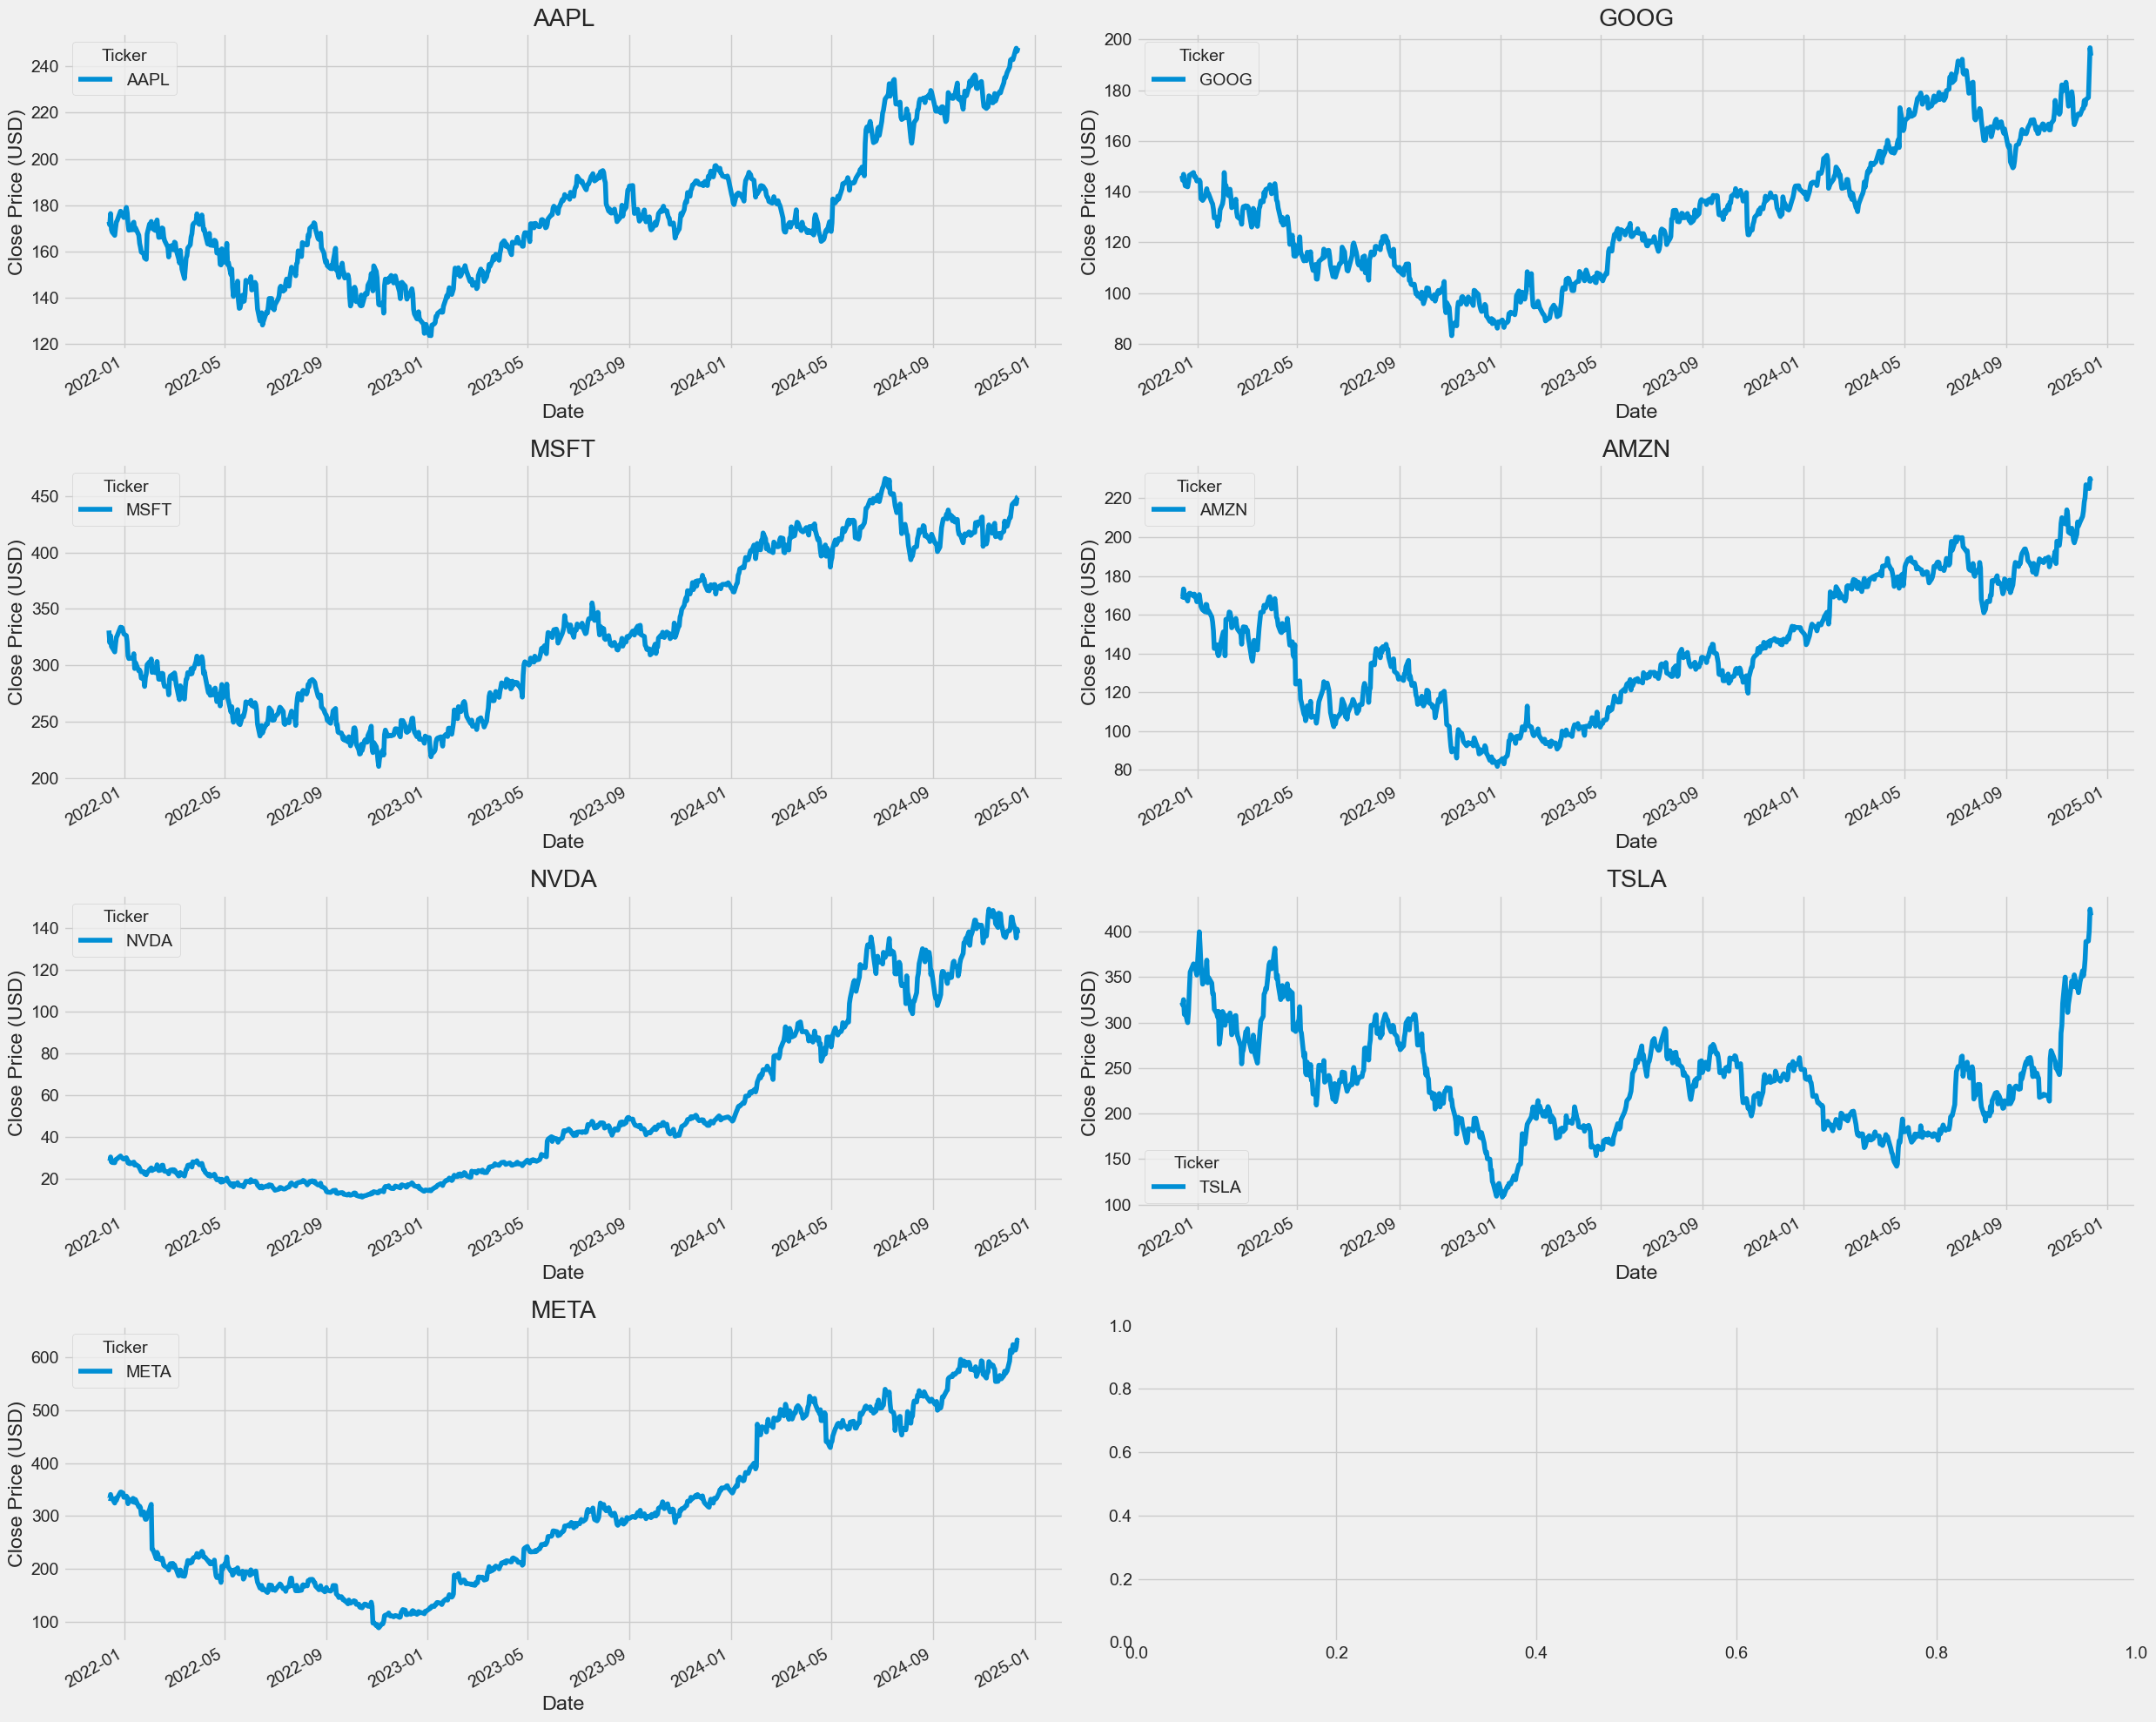

In [175]:
# Plotting Close Price History in a year
fig, axes = plt.subplots(4,2, figsize=(25,20))
axes = axes.flatten()

for i, company in enumerate(tech_list):
    companies[company]["Adj Close"].plot(ax=axes[i],title=company)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Close Price (USD)")

plt.tight_layout()
plt.show()


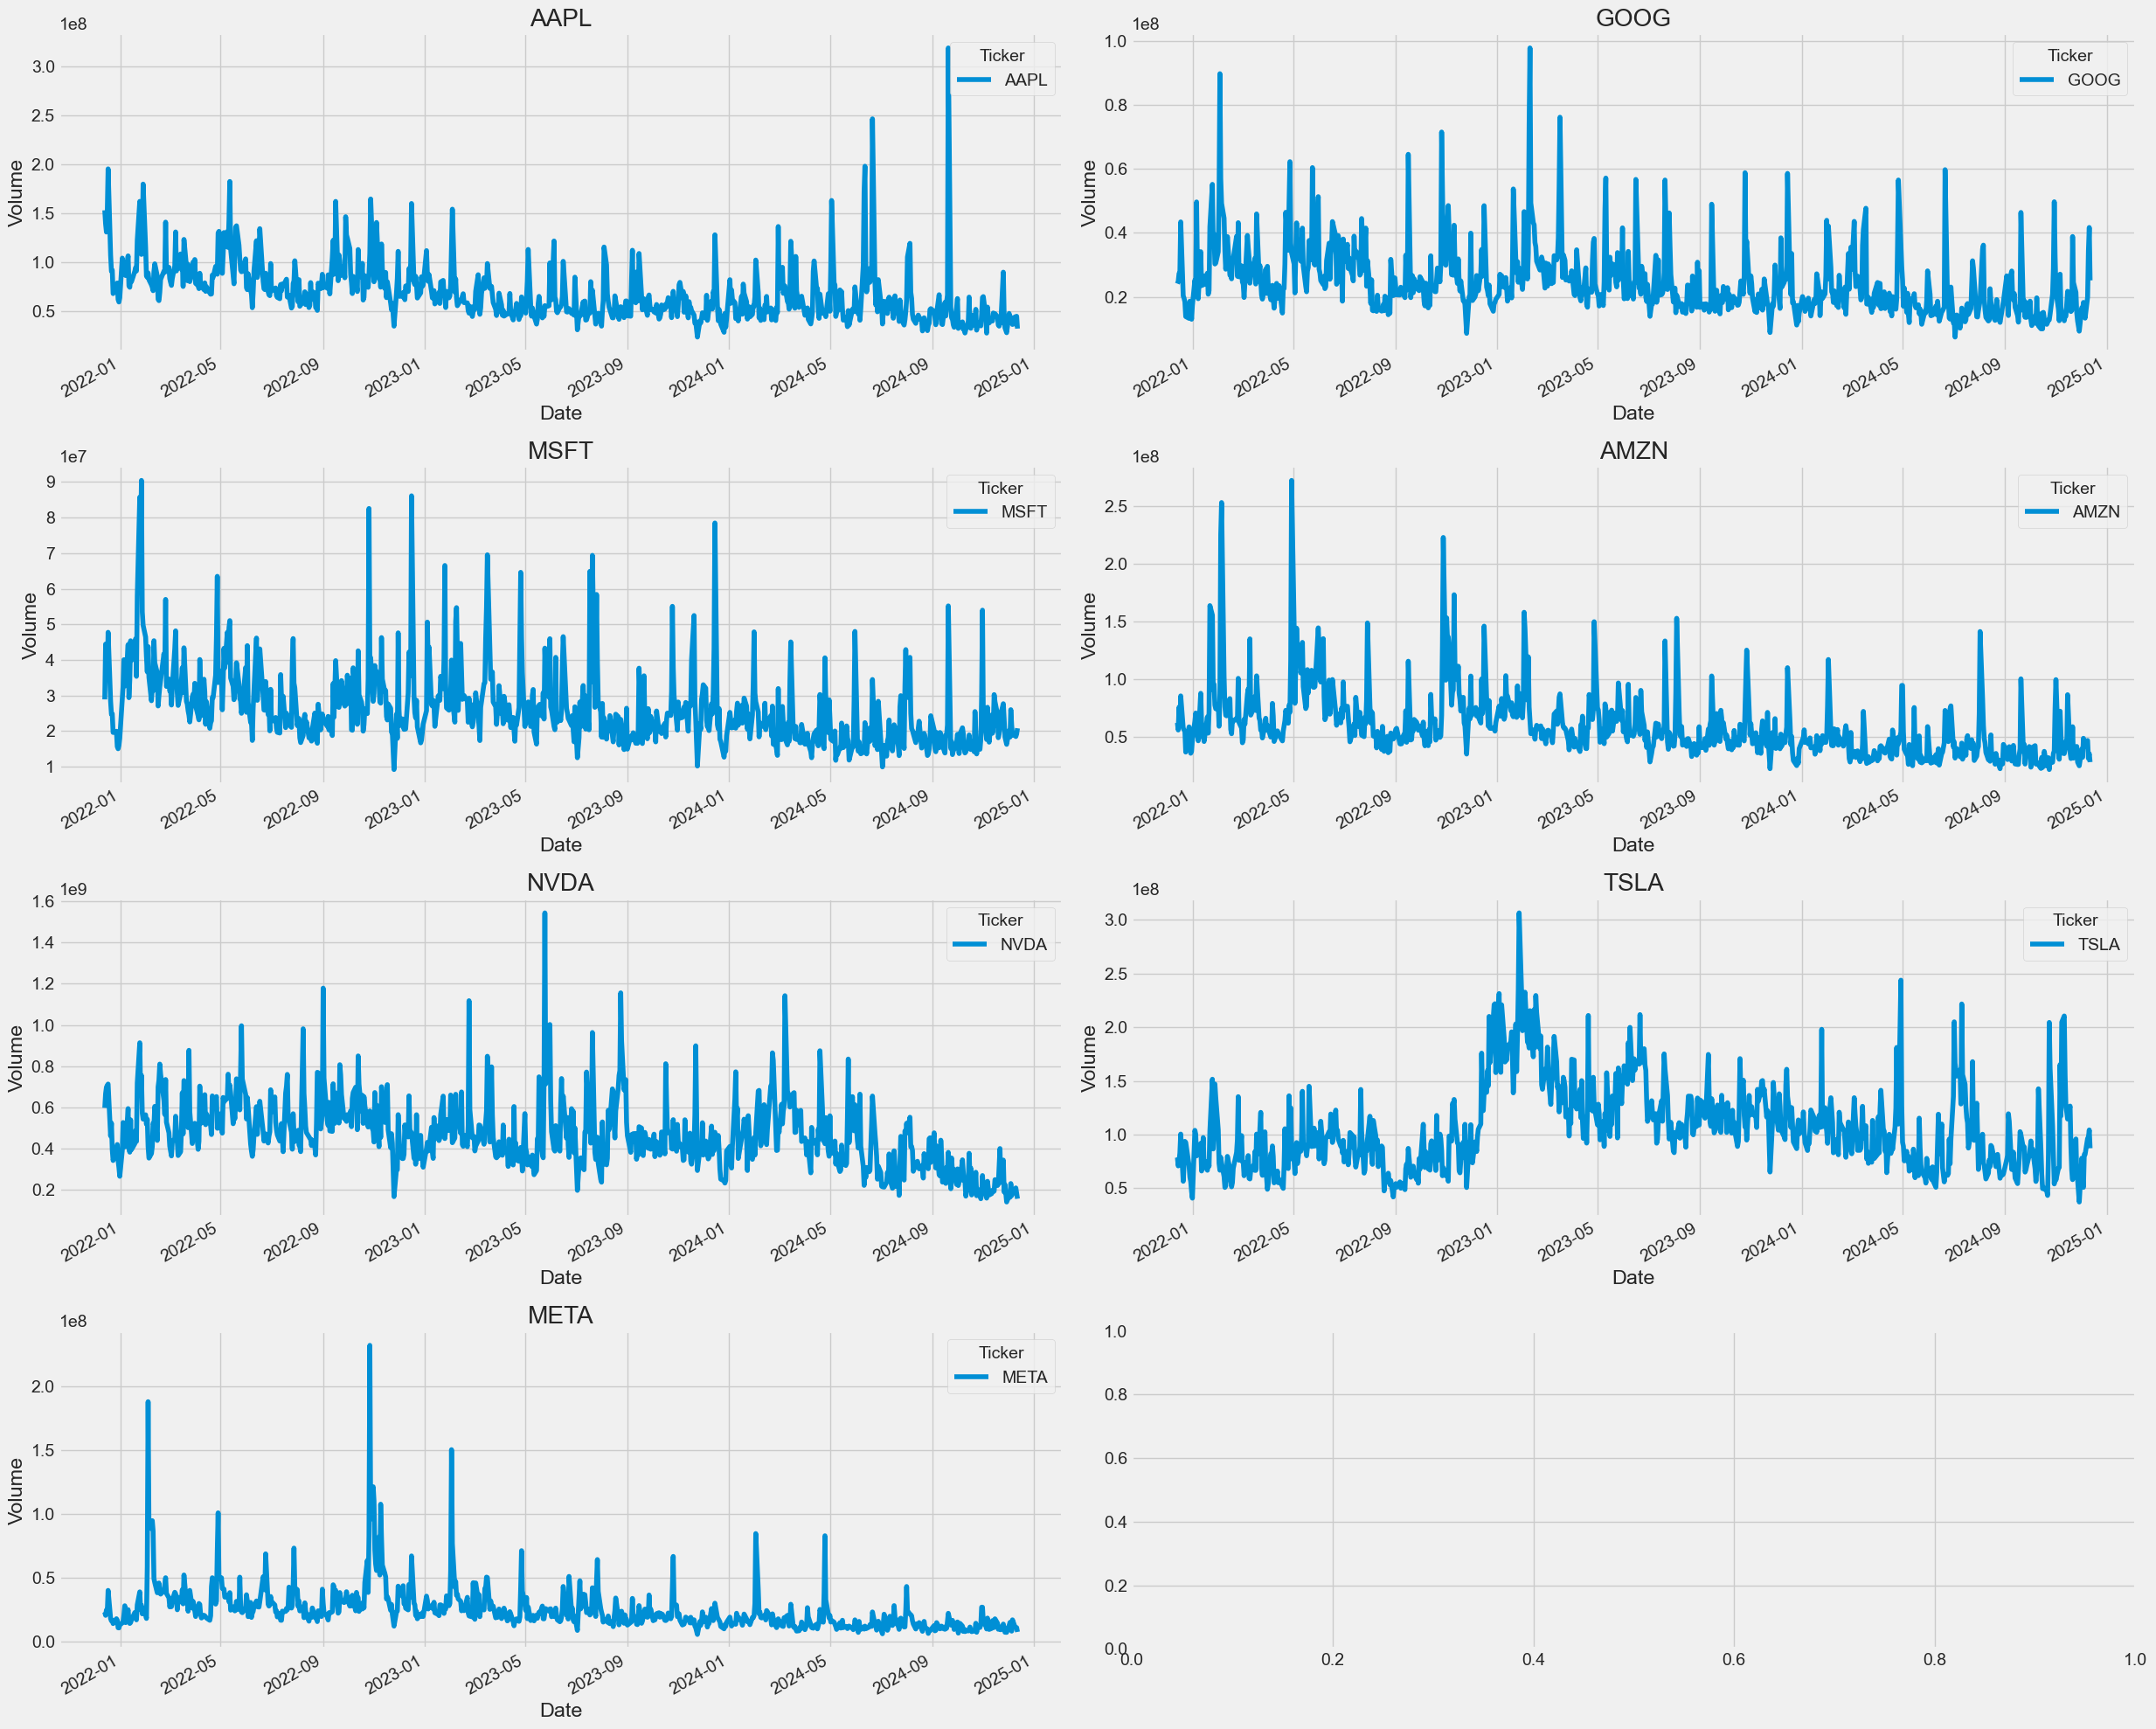

In [176]:
fig, axes = plt.subplots(4,2, figsize=(25,20))
axes = axes.flatten()

for i,company in enumerate(tech_list):
    companies[company]["Volume"].plot(ax=axes[i],title=company)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Volume")

plt.tight_layout()
plt.show()

In [177]:
horizons = [5,10,25,50]

for horizon in horizons:
    for company in companies:
        column_ma = f"MA for {horizon} days"
        column_ratio = f"Ratio for {horizon} days"
        column_trend = f"Trend for {horizon} days"
        column_std = f"Standard Deviation for {horizon} days"

        moving_avg = companies[company]["Adj Close",company].rolling(horizon).mean()

        # Moving averages of the price
        companies[company][column_ma,company] = moving_avg
        # Current price compares to its average over a period
        companies[company][column_ratio,company] = companies[company]["Adj Close", company]/moving_avg
        # Rolling Std as volatility/risk
        companies[company][column_std,company] = companies[company]["Adj Close", company].rolling(horizon).std()

        
print(companies[company]['Standard Deviation for 5 days'])


Ticker                          META
Date                                
2021-12-13 00:00:00+00:00        NaN
2021-12-14 00:00:00+00:00        NaN
2021-12-15 00:00:00+00:00        NaN
2021-12-16 00:00:00+00:00        NaN
2021-12-17 00:00:00+00:00   3.348264
...                              ...
2024-12-06 00:00:00+00:00  11.307360
2024-12-09 00:00:00+00:00   5.449218
2024-12-10 00:00:00+00:00   5.747487
2024-12-11 00:00:00+00:00   9.202567
2024-12-12 00:00:00+00:00   7.940130

[755 rows x 1 columns]


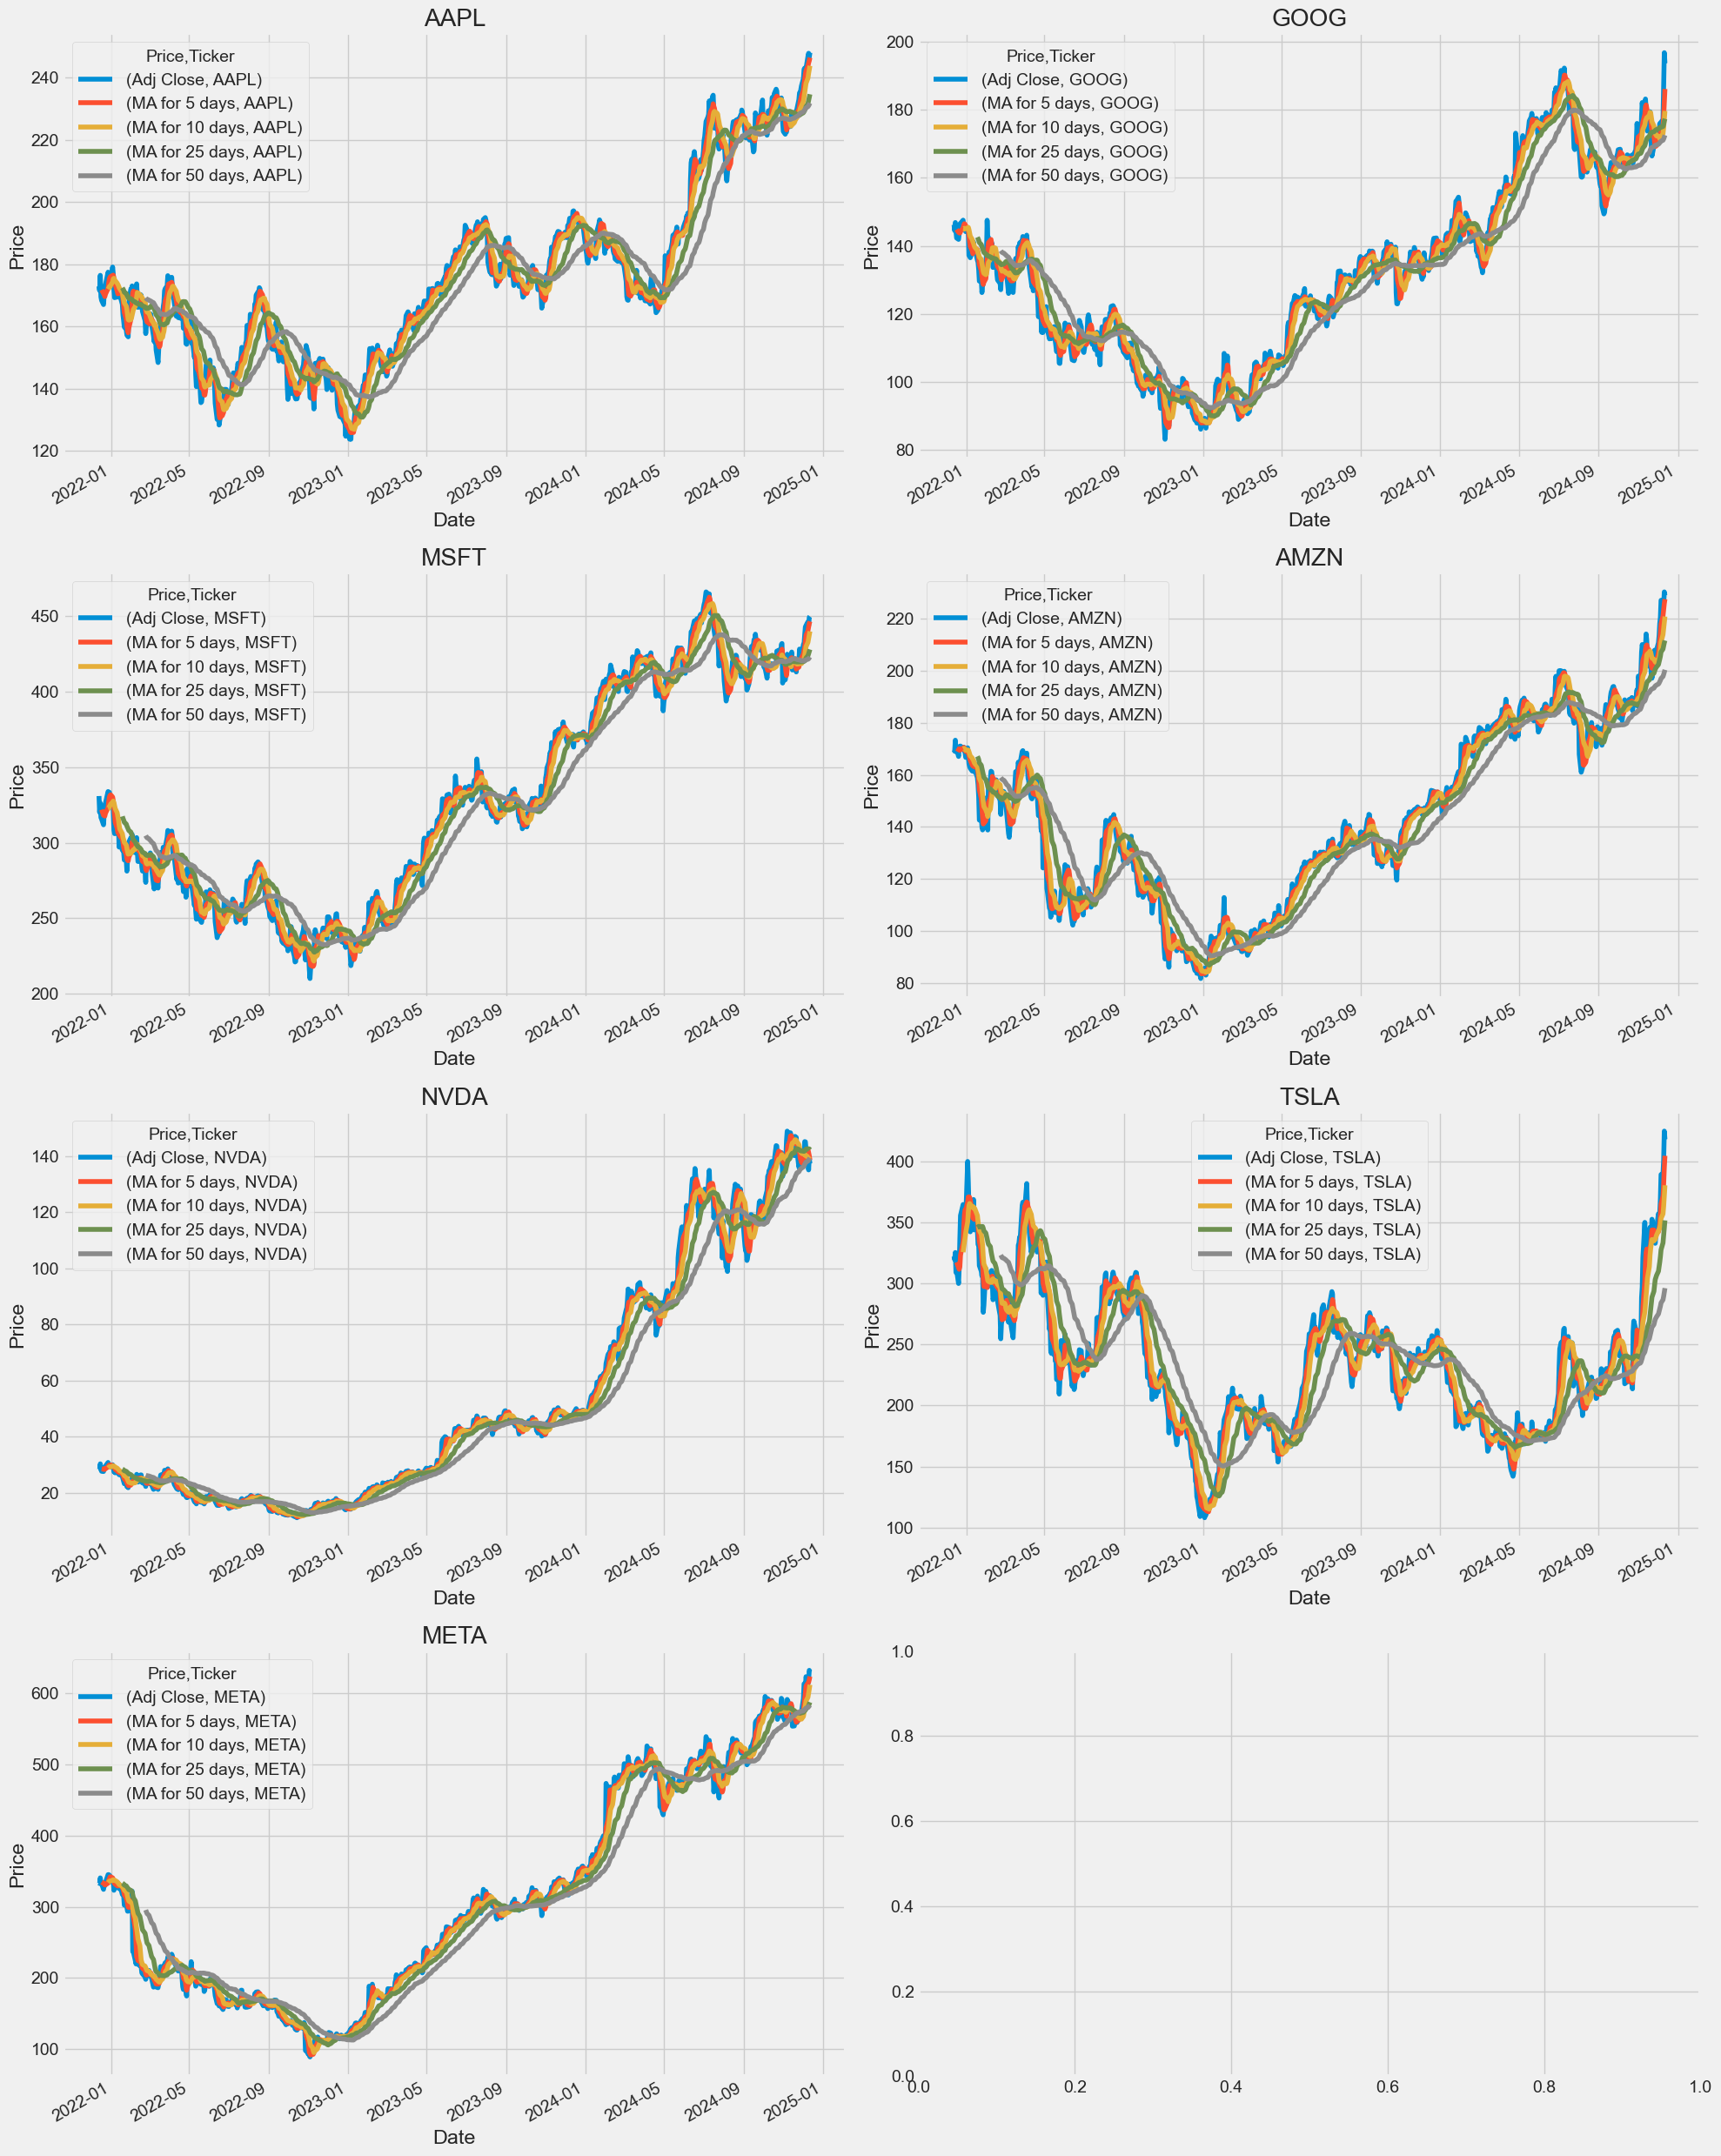

In [178]:
fig, axes = plt.subplots(4,2)
axes = axes.flatten()
fig.set_figheight(25)
fig.set_figwidth(20)

for i, company in enumerate(tech_list):
    companies[company][['Adj Close', 'MA for 5 days', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[i], title=company)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price")

fig.tight_layout()
plt.show()

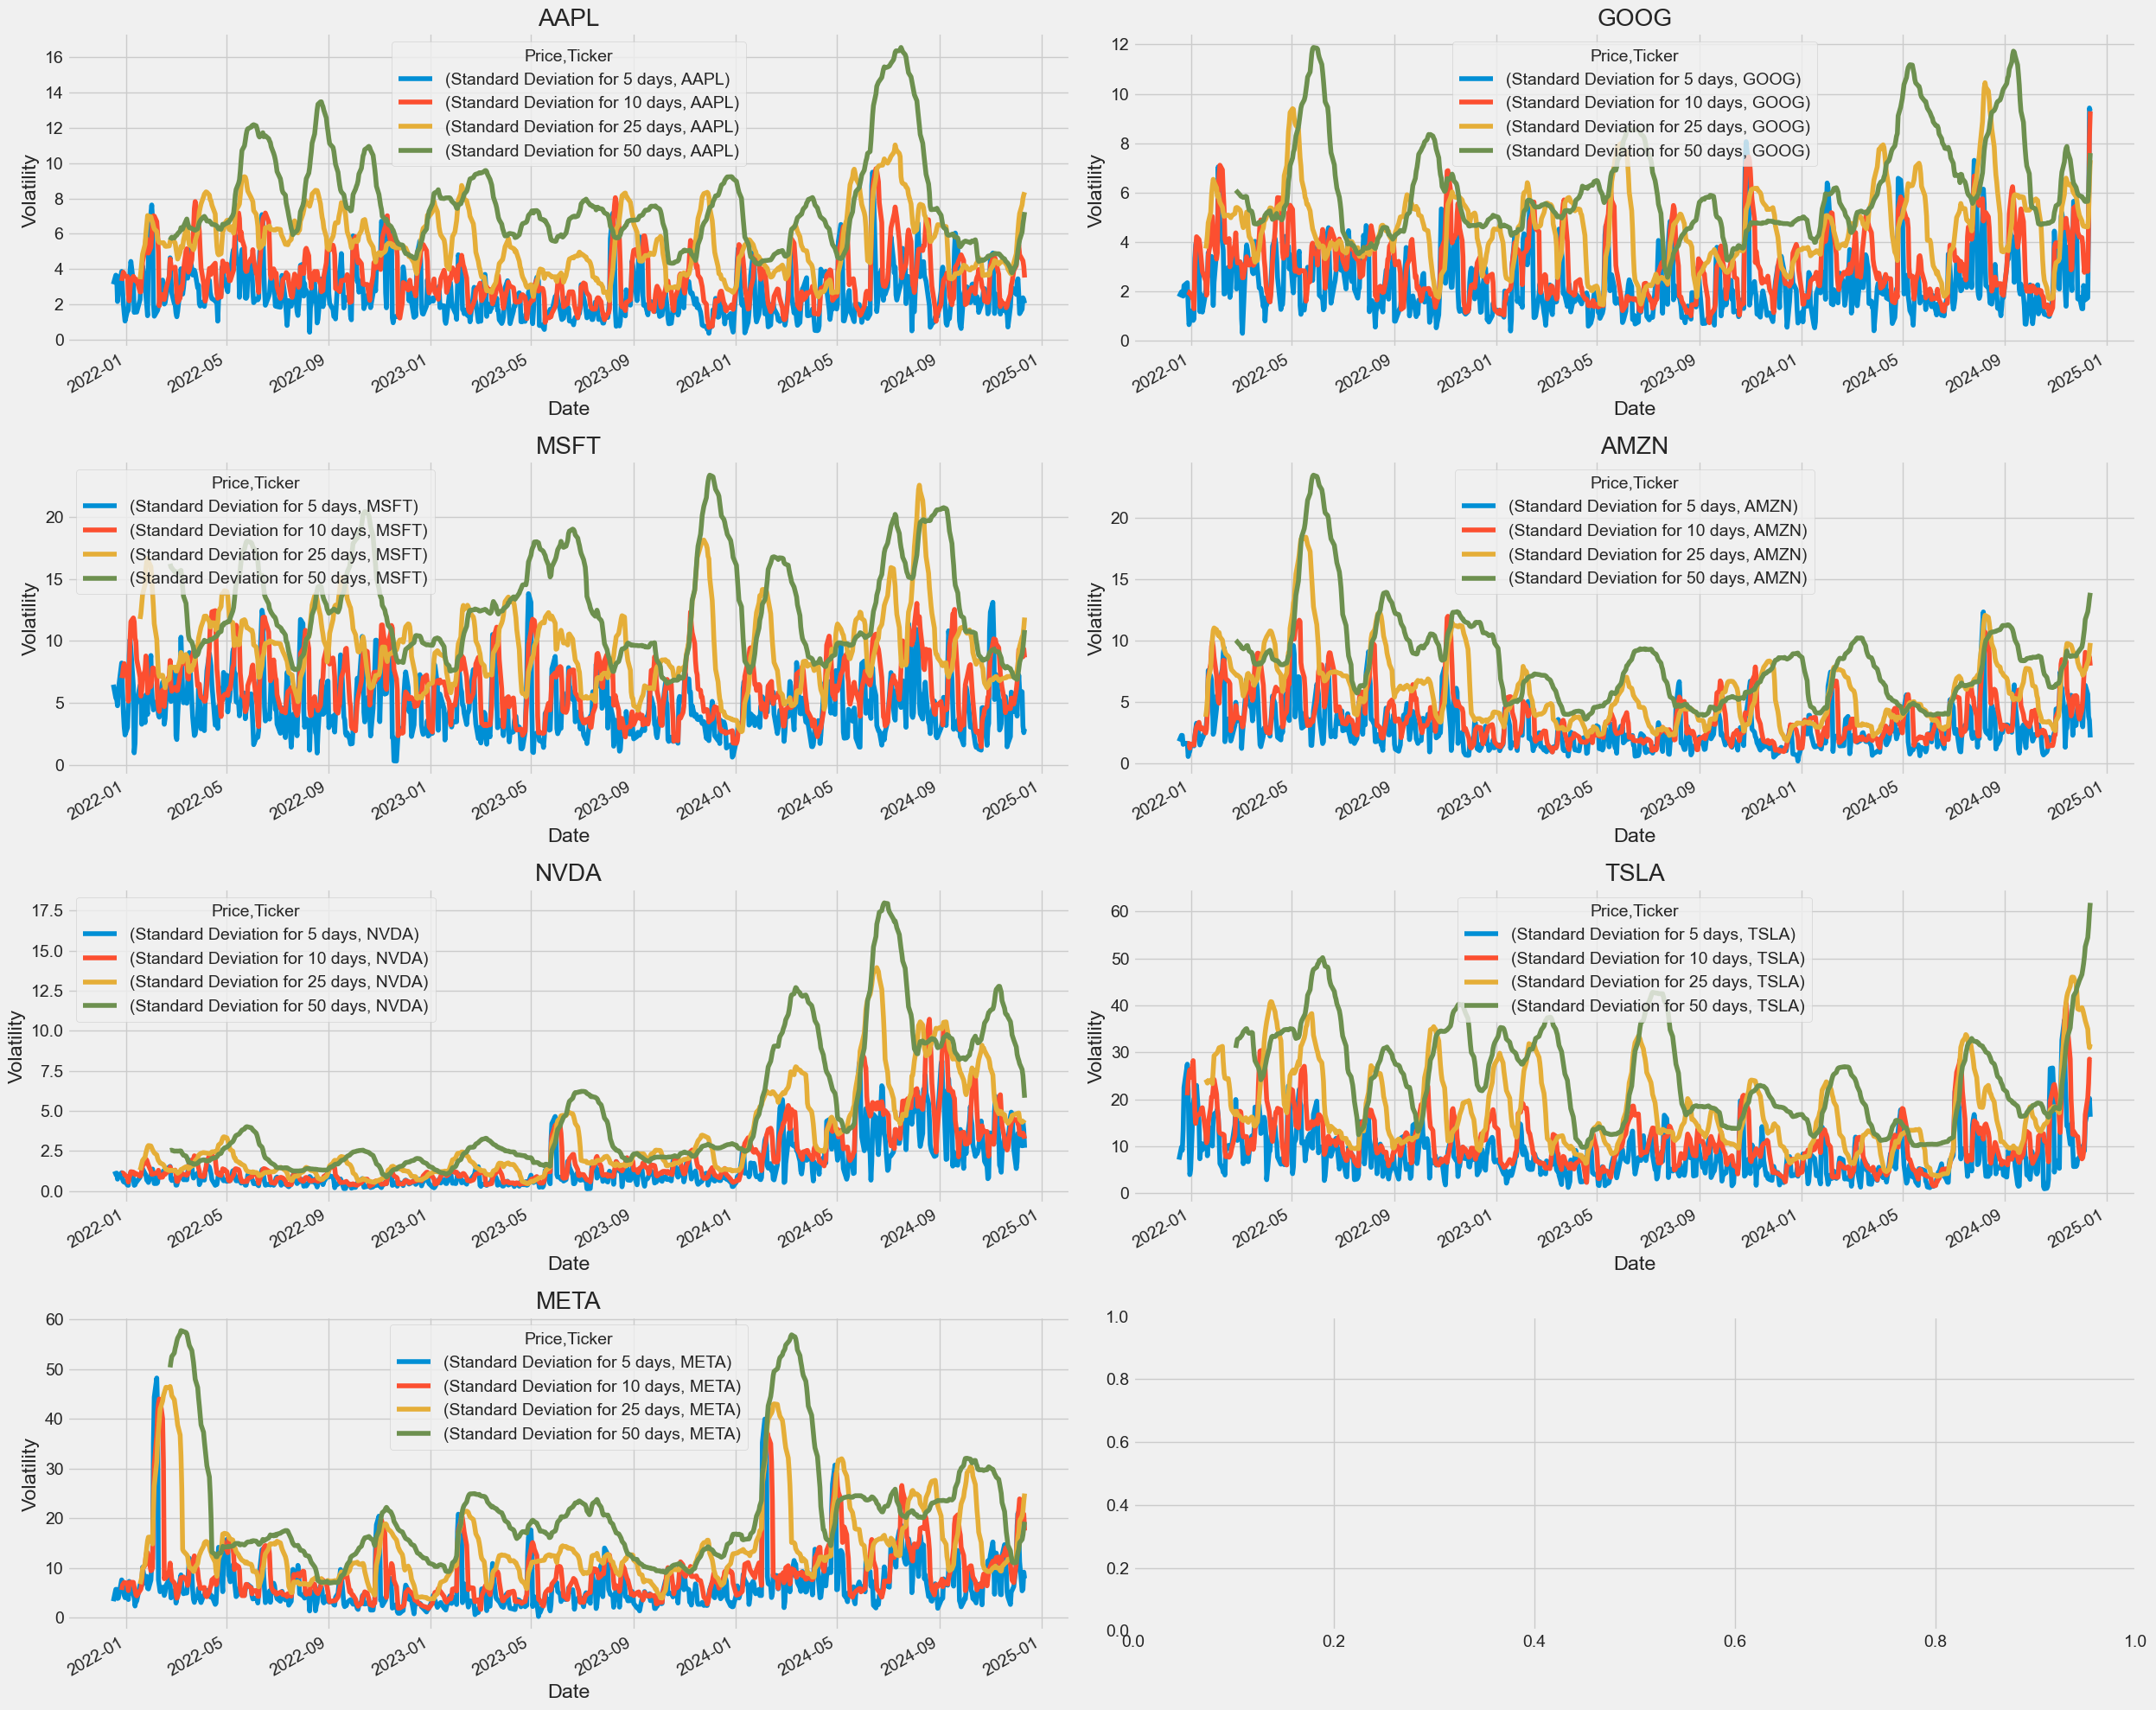

In [179]:
fig,axes = plt.subplots(4,2, figsize=(25,20))
axes = axes.flatten()

for i,company in enumerate(companies):
    companies[company][['Standard Deviation for 5 days', 'Standard Deviation for 10 days', 'Standard Deviation for 25 days', 'Standard Deviation for 50 days']].plot(ax=axes[i], title=company)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Volatility')

plt.tight_layout()

In [180]:
# We'll use pct_change to find the percent change for each day
for company in companies:
    companies[company]['Daily Return',company] = companies[company]['Adj Close', company].pct_change()
    print(companies[company].columns)


MultiIndex([(                     'Adj Close', 'AAPL'),
            (                         'Close', 'AAPL'),
            (                          'High', 'AAPL'),
            (                           'Low', 'AAPL'),
            (                          'Open', 'AAPL'),
            (                        'Volume', 'AAPL'),
            (               'Next Week Price', 'AAPL'),
            (              'Close Price (-1)', 'AAPL'),
            (              'Close Price (-5)', 'AAPL'),
            (             'Close Price (-10)', 'AAPL'),
            (             'Close Price (-25)', 'AAPL'),
            (                 'MA for 5 days', 'AAPL'),
            (              'Ratio for 5 days', 'AAPL'),
            ( 'Standard Deviation for 5 days', 'AAPL'),
            (                'MA for 10 days', 'AAPL'),
            (             'Ratio for 10 days', 'AAPL'),
            ('Standard Deviation for 10 days', 'AAPL'),
            (                'MA for 25 days', '

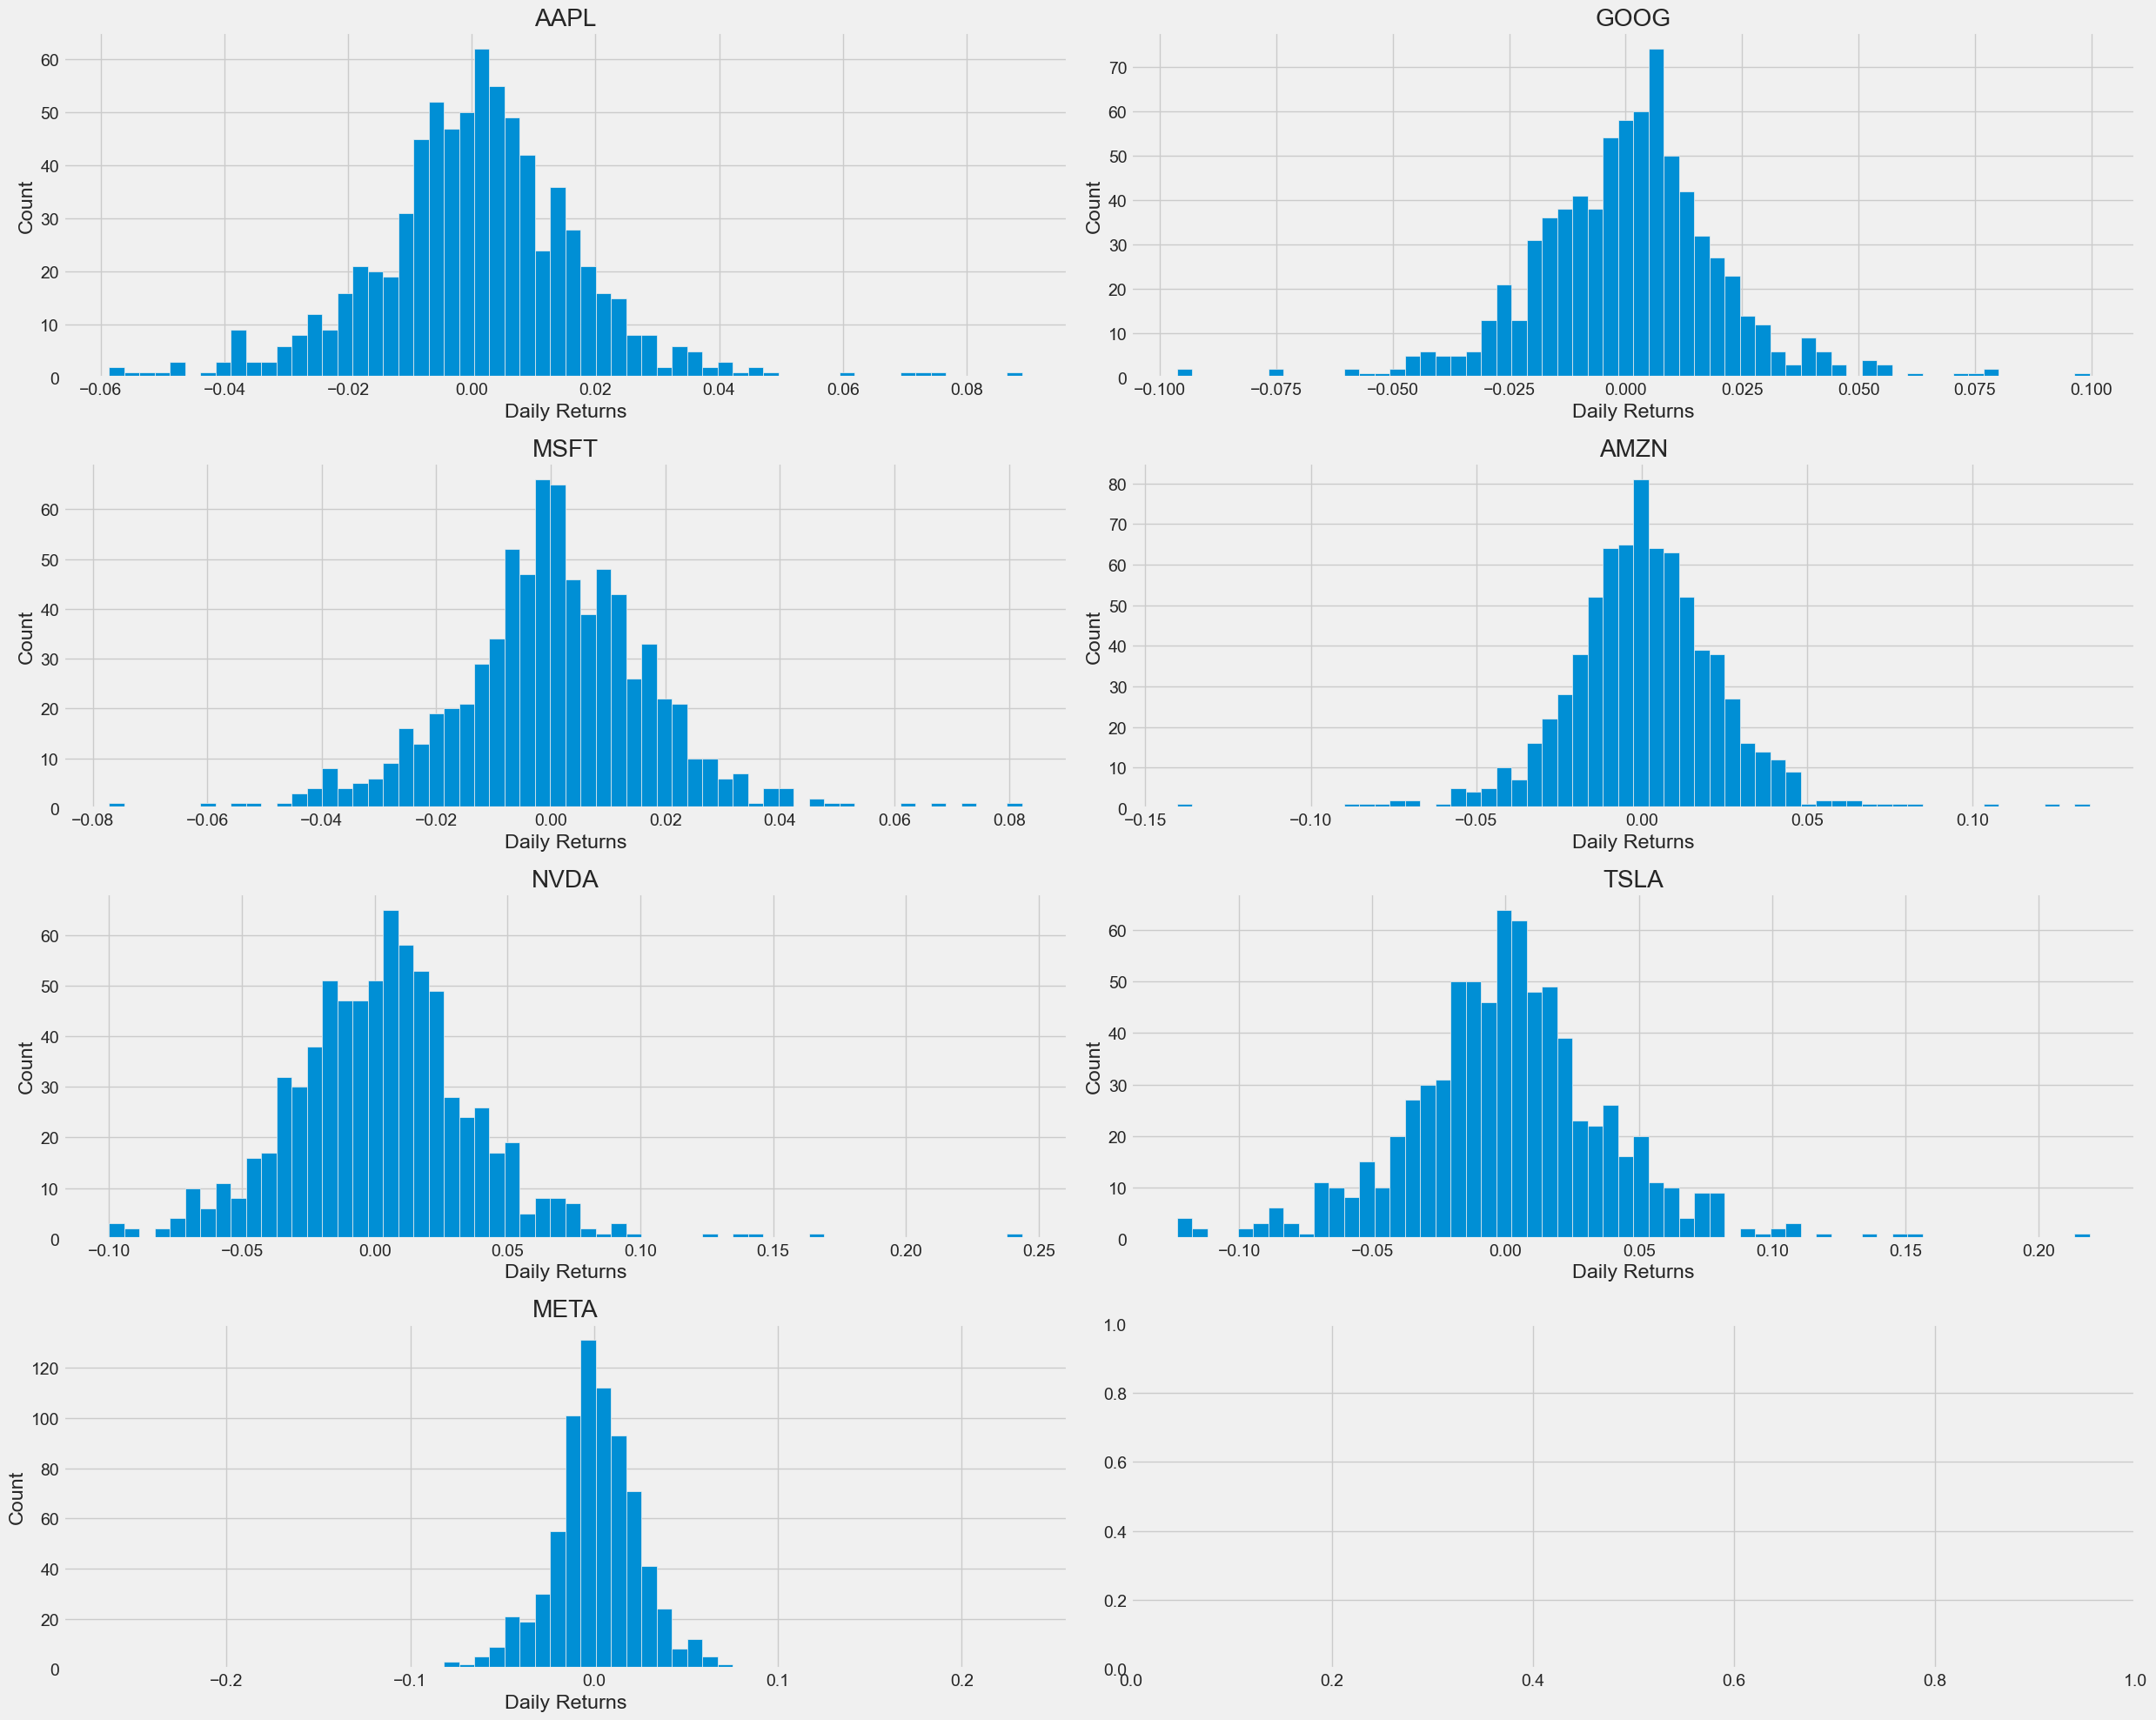

In [181]:
fig, axes = plt.subplots(4,2, figsize=(25,20))
axes = axes.flatten()

for i,company in enumerate(companies):
    companies[company]["Daily Return"].hist(ax=axes[i], bins=60)
    axes[i].set_xlabel("Daily Returns")
    axes[i].set_ylabel("Count")
    axes[i].set_title(company)

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Closing Price in USD')

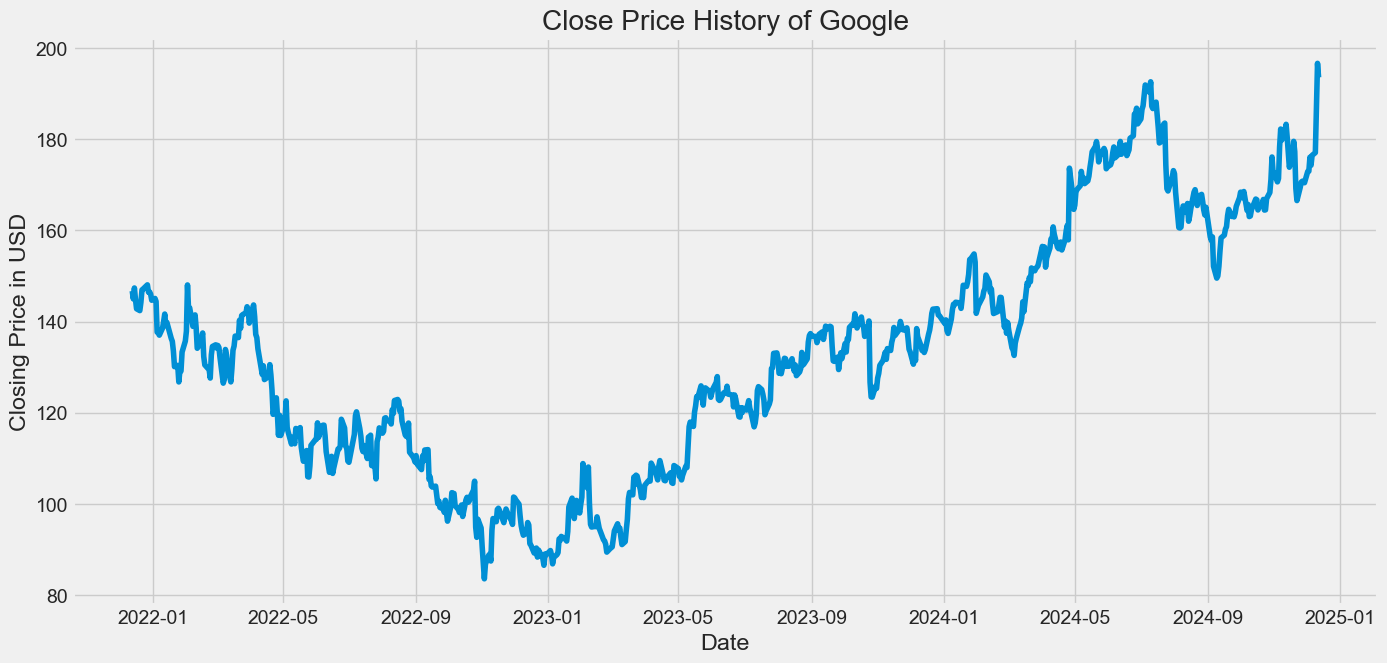

In [477]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


stock = 'GOOG'
unscaled_df = companies[stock]


plt.figure(figsize=(15,7))
plt.title("Close Price History of Google")
plt.plot(unscaled_df["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price in USD")

In [479]:
unscaled_df.head(7)

Price                       Adj Close       Close        High         Low  \
Ticker                           GOOG        GOOG        GOOG        GOOG   
Date                                                                        
2021-12-13 00:00:00+00:00  146.179260  146.704498  148.562500  146.360001   
2021-12-14 00:00:00+00:00  144.451477  144.970505  145.442001  142.242493   
2021-12-15 00:00:00+00:00  146.840881  147.368500  147.517242  142.705505   
2021-12-16 00:00:00+00:00  144.319962  144.838501  148.551498  144.092499   
2021-12-17 00:00:00+00:00  142.291733  142.802994  144.460098  141.787994   
2021-12-20 00:00:00+00:00  141.891663  142.401505  142.610504  140.250000   
2021-12-21 00:00:00+00:00  143.704178  144.220505  144.692047  141.735001   

Price                            Open    Volume Next Week Price  \
Ticker                           GOOG      GOOG            GOOG   
Date                                                              
2021-12-13 00:00:00+00:00  148.444000  24104000      141.891663   
2021-12-14 00:00:00+00:00  144.770004  24778000      143.704178   
2021-12-15 00:00:00+00:00  144.365997  27280000      146.422882   
2021-12-16 00:00:00+00:00  148.076996  27400000      146.615707   
2021-12-17 00:00:00+00:00  142.714493  43404000      147.533875   
2021-12-20 00:00:00+00:00  140.679596  20264000      145.923676   
2021-12-21 00:00:00+00:00  143.149994  19548000      145.979980   

Price                     Close Price (-1) Close Price (-5) Close Price (-10)  \
Ticker                                GOOG             GOOG              GOOG   
Date                                                                            
2021-12-13 00:00:00+00:00              NaN              NaN               NaN   
2021-12-14 00:00:00+00:00       146.179260              NaN               NaN   
2021-12-15 00:00:00+00:00       144.451477              NaN               NaN   
2021-12-16 00:00:00+00:00       146.840881              NaN               NaN   
2021-12-17 00:00:00+00:00       144.319962              NaN               NaN   
2021-12-20 00:00:00+00:00       142.291733       146.179260               NaN   
2021-12-21 00:00:00+00:00       141.891663       144.451477               NaN   

Price                      ... MA for 10 days Ratio for 10 days  \
Ticker                     ...           GOOG              GOOG   
Date                       ...                                    
2021-12-13 00:00:00+00:00  ...            NaN               NaN   
2021-12-14 00:00:00+00:00  ...            NaN               NaN   
2021-12-15 00:00:00+00:00  ...            NaN               NaN   
2021-12-16 00:00:00+00:00  ...            NaN               NaN   
2021-12-17 00:00:00+00:00  ...            NaN               NaN   
2021-12-20 00:00:00+00:00  ...            NaN               NaN   
2021-12-21 00:00:00+00:00  ...            NaN               NaN   

Price                     Standard Deviation for 10 days MA for 25 days  \
Ticker                                              GOOG           GOOG   
Date                                                                      
2021-12-13 00:00:00+00:00                            NaN            NaN   
2021-12-14 00:00:00+00:00                            NaN            NaN   
2021-12-15 00:00:00+00:00                            NaN            NaN   
2021-12-16 00:00:00+00:00                            NaN            NaN   
2021-12-17 00:00:00+00:00                            NaN            NaN   
2021-12-20 00:00:00+00:00                            NaN            NaN   
2021-12-21 00:00:00+00:00                            NaN            NaN   

Price                     Ratio for 25 days Standard Deviation for 25 days  \
Ticker                                 GOOG                           GOOG   
Date                                                                         
2021-12-13 00:00:00+00:00               NaN                            NaN   
2021-12-14 00

In [480]:
features = [col for col in unscaled_df.columns if col[0] != 'Next Week Price']

target = [col for col in unscaled_df.columns if col[0] == 'Next Week Price']
unscaled_df = unscaled_df.dropna()

train_size = int(len(unscaled_df)*0.8)

X_train, X_val = unscaled_df[features].iloc[:train_size], unscaled_df[features].iloc[train_size:]
y_train, y_val = unscaled_df[target].iloc[:train_size], unscaled_df[target].iloc[train_size:]


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

print(X_val.columns)

(560, 23) (560, 1)
(141, 23) (141, 1)
MultiIndex([(                     'Adj Close', 'GOOG'),
            (                         'Close', 'GOOG'),
            (                          'High', 'GOOG'),
            (                           'Low', 'GOOG'),
            (                          'Open', 'GOOG'),
            (                        'Volume', 'GOOG'),
            (              'Close Price (-1)', 'GOOG'),
            (              'Close Price (-5)', 'GOOG'),
            (             'Close Price (-10)', 'GOOG'),
            (             'Close Price (-25)', 'GOOG'),
            (                 'MA for 5 days', 'GOOG'),
            (              'Ratio for 5 days', 'GOOG'),
            ( 'Standard Deviation for 5 days', 'GOOG'),
            (                'MA for 10 days', 'GOOG'),
            (             'Ratio for 10 days', 'GOOG'),
            ('Standard Deviation for 10 days', 'GOOG'),
            (                'MA for 25 days', 'GOOG'),
          

In [483]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_train_scaled = scalerX.fit_transform(X_train)
X_val_scaled = scalerX.transform(X_val)

y_train_scaled = scalerY.fit_transform(y_train)
y_val_scaled = scalerY.transform(y_val)


print( y_train_scaled.shape)
print(X_train_scaled.shape)
print(X_train_scaled)


(560, 1)
(560, 23)
[[0.48783056 0.48783049 0.50293749 ... 0.27790327 0.37887109 0.41991785]
 [0.54412541 0.54412535 0.51726941 ... 0.38705046 0.3749926  0.6950609 ]
 [0.56454814 0.56454806 0.5434406  ... 0.42888286 0.37095403 0.56256604]
 ...
 [0.96703159 0.96703163 0.93913429 ... 0.80093185 0.92326837 0.50985234]
 [0.97842693 0.97842668 0.95949706 ... 0.80453906 0.90564622 0.52232723]
 [1.         1.         0.97358414 ... 0.82380664 0.88651705 0.54944284]]


[0]	validation_0-rmse:0.19482	validation_1-rmse:0.48796
[1]	validation_0-rmse:0.17658	validation_1-rmse:0.44440
[2]	validation_0-rmse:0.16016	validation_1-rmse:0.40515
[3]	validation_0-rmse:0.14537	validation_1-rmse:0.36984
[4]	validation_0-rmse:0.13201	validation_1-rmse:0.33809
[5]	validation_0-rmse:0.11989	validation_1-rmse:0.30959
[6]	validation_0-rmse:0.10900	validation_1-rmse:0.28404
[7]	validation_0-rmse:0.09911	validation_1-rmse:0.26859
[8]	validation_0-rmse:0.09021	validation_1-rmse:0.25185
[9]	validation_0-rmse:0.08215	validation_1-rmse:0.23378
[10]	validation_0-rmse:0.07487	validation_1-rmse:0.21595
[11]	validation_0-rmse:0.06832	validation_1-rmse:0.20091
[12]	validation_0-rmse:0.06245	validation_1-rmse:0.18815
[13]	validation_0-rmse:0.05705	validation_1-rmse:0.17581
[14]	validation_0-rmse:0.05222	validation_1-rmse:0.16537
[15]	validation_0-rmse:0.04787	validation_1-rmse:0.15571
[16]	validation_0-rmse:0.04392	validation_1-rmse:0.14729
[17]	validation_0-rmse:0.04034	validation

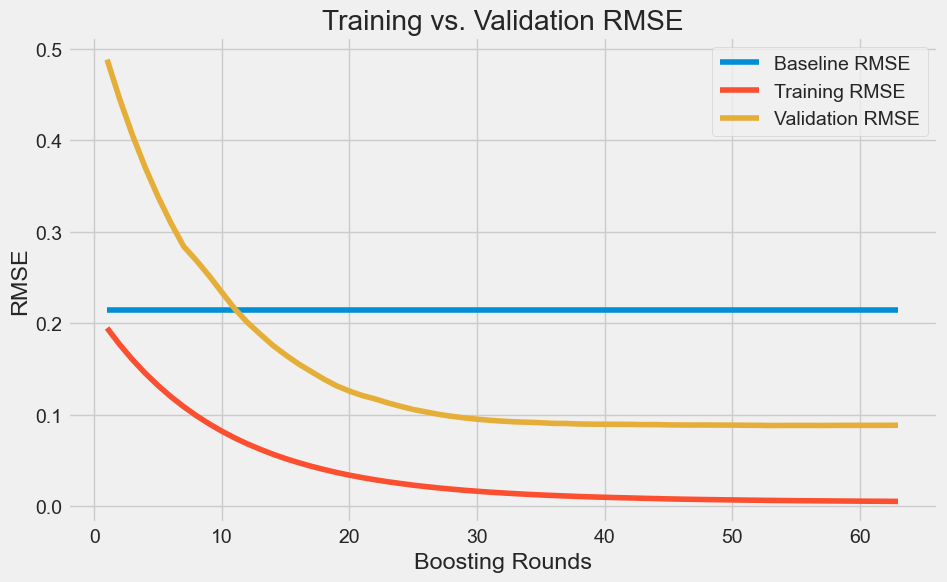

In [504]:
depth = [100,250,500,1000]
learn_rate = [0.01, 0.05, 0.1, 0.25, 0.5]


XGBmodel = XGBRegressor(n_estimators=500, learning_rate = 0.1,verbosity = 1, early_stopping_rounds = 10, random_state = 10)
XGBmodel.fit(X_train_scaled,y_train_scaled, eval_set=[(X_train_scaled, y_train_scaled),(X_val_scaled,y_val_scaled)])


# Access evaluation results
results = XGBmodel.evals_result()

# Extract metrics for training and validation
train_rmse = results["validation_0"]["rmse"]
val_rmse = results["validation_1"]["rmse"]

# Plot the metrics
epochs = range(1, len(train_rmse) + 1)

#set baseline
y_mean = y_train_scaled.mean()
y_baseline = [y_mean]*len(y_train_scaled)
baseline = [np.sqrt(mean_squared_error(y_train_scaled, y_baseline))]*len(train_rmse)

plt.figure(figsize=(10, 6))
plt.plot(epochs, baseline, label="Baseline RMSE")
plt.plot(epochs, train_rmse, label="Training RMSE")
plt.plot(epochs, val_rmse, label="Validation RMSE")
plt.xlabel("Boosting Rounds")
plt.ylabel("RMSE")
plt.title("Training vs. Validation RMSE")
plt.legend()
plt.grid(True)
plt.show()

In [505]:
XGBmodel.best_iteration


52

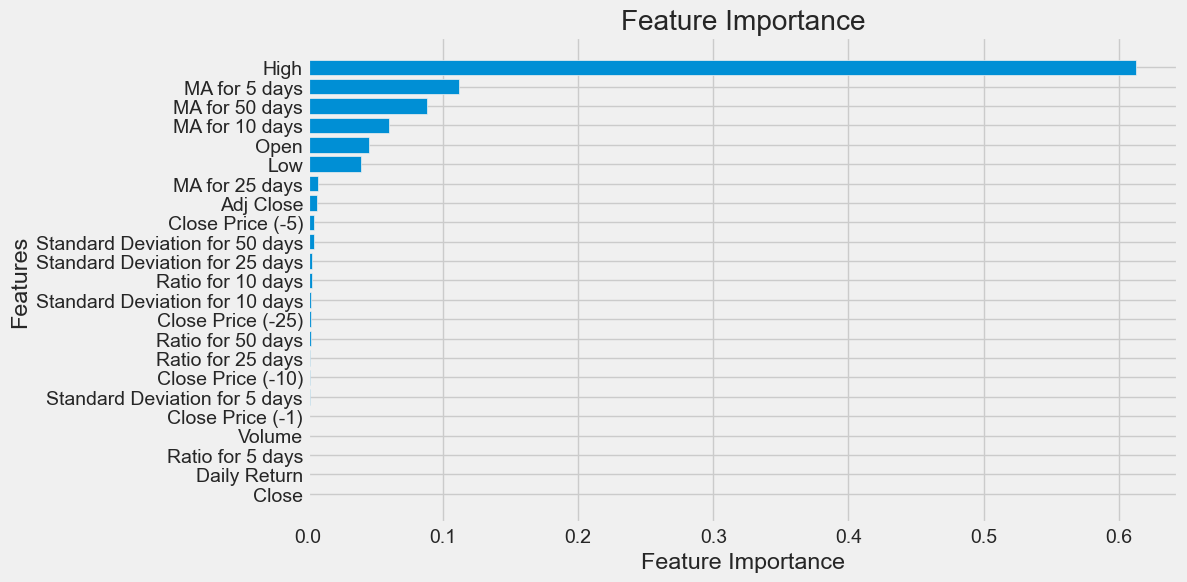

In [506]:

feature_importances = XGBmodel.feature_importances_
feature_name = [name[0] for name in features]

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": feature_name,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [507]:
# Model Prediction

y_train_pred = XGBmodel.predict(X_train_scaled)
y_val_pred = XGBmodel.predict(X_val_scaled)

baseline_mse = np.sqrt(mean_squared_error(y_train_scaled, y_baseline))
train_mse = np.sqrt(mean_squared_error(y_train_scaled, y_train_pred))
val_mse = np.sqrt(mean_squared_error(y_val_scaled, y_val_pred))

print(f"Baseline MSE: {baseline_mse:.8f}")
print(f"Training MSE: {train_mse:.8f}")
print(f"Cross Val MSE: {val_mse:.8f}")

Baseline MSE: 0.21494509
Training MSE: 0.00658046
Cross Val MSE: 0.08841176


In [508]:
print(f"Y train prediction {scalerY.inverse_transform(y_train_pred[5:10].reshape(-1,1))}")
print(f"Y train real value {scalerY.inverse_transform(y_train_scaled[5:10])}")

print(f"Y crossval prediction {scalerY.inverse_transform(y_val_pred[5:10].reshape(-1,1))}")
print(f"Y crossval real value {scalerY.inverse_transform(y_val_scaled[5:10])}")

Y train prediction [[132.96617]
 [131.7333 ]
 [130.90364]
 [126.64828]
 [129.47574]]
Y train real value [[133.38673401]
 [132.20697021]
 [130.00836182]
 [126.28723145]
 [129.19628906]]
Y crossval prediction [[175.07631]
 [175.13194]
 [175.99503]
 [175.57065]
 [175.08875]]
Y crossval real value [[173.33717346]
 [173.79553223]
 [174.50300598]
 [176.43606567]
 [177.71147156]]
